In [7]:
# 경고메세지 제거
import warnings
warnings.filterwarnings('ignore')

# 폰트 설정
import matplotlib.pyplot as plt
from matplotlib import font_manager
font_fname = 'c:/windows/fonts/malgun.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams['font.family'] = font_family


In [8]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from matplotlib import font_manager

In [9]:
df = pd.read_csv('경기도 시별 대중교통 이용자수 분석 데이터.csv',engine='python', encoding = 'euc-kr')
df.head()

,시도,시군구,시가화면적(㎢),정류장수,공급도
0,경기도,수원시,223.28,1397,6.3
1,경기도,성남시,114.57,1557,13.6
2,경기도,의정부시,18.44,817,44.3
3,경기도,안양시,41.18,826,20.1
4,경기도,부천시,34.52,1352,39.2


In [10]:
df.shape

(56, 5)

In [11]:
df.isnull().sum()

시도          0
시군구         0
시가화면적(㎢)    0
정류장수        0
공급도         0
dtype: int64

In [12]:
df['공급도'].mean()

46.121428571428574

In [13]:
df['공급도'].describe()

count     56.000000
mean      46.121429
std       31.670208
min        6.300000
25%       32.250000
50%       40.350000
75%       48.775000
max      193.400000
Name: 공급도, dtype: float64

# 서울

In [16]:
# 시가화면적 : 용도지역 중 주거지역, 상업지역 및 공업지역 면적의 합
df_seoul = df[df['시도'].str.contains('서울')]
df_seoul.mean()

시가화면적(㎢)     14.872
정류장수        599.840
공급도          40.644
dtype: float64

In [22]:
df_seoul.describe()

,시가화면적(㎢),정류장수,공급도
count,25.000000,25.000000,25.000000
mean,14.872000,599.840000,40.644000
std,3.990805,163.710028,7.095426
min,9.950000,264.000000,26.500000
25%,12.470000,470.000000,35.900000
50%,14.140000,536.000000,41.300000
75%,15.720000,703.000000,44.900000
max,25.870000,907.000000,53.200000


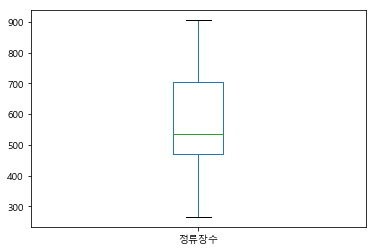

In [23]:
df_seoul['정류장수'].plot(kind="box")

In [24]:
# (서울)정류장수 순위
df_seoul.sort_values(by='정류장수', ascending = False).head(10)

,시도,시군구,시가화면적(㎢),정류장수,공급도
52,서울특별시,서초구,20.21,907,44.9
53,서울특별시,강남구,25.87,904,34.9
46,서울특별시,강서구,18.96,830,43.8
41,서울특별시,노원구,14.52,773,53.2
44,서울특별시,마포구,14.32,729,50.9
47,서울특별시,구로구,14.98,728,48.6
49,서울특별시,영등포구,15.65,703,44.9
38,서울특별시,성북구,18.19,700,38.5
51,서울특별시,관악구,15.72,695,44.2
42,서울특별시,은평구,15.89,660,41.5


In [25]:
# 공급도 = (정류장 수)/ (시가화면적) *시가화면적: 용도지역 중 주거지역, 상업지역 및 공업지역 면적의 합
# 버스 공급도가 높을수록 교통 접근성이 좋은거임 
# (서울)공급도 순위
df_seoul.sort_values(by='공급도', ascending = False).head(10)

,시도,시군구,시가화면적(㎢),정류장수,공급도
41,서울특별시,노원구,14.52,773,53.2
44,서울특별시,마포구,14.32,729,50.9
40,서울특별시,도봉구,10.45,529,50.6
47,서울특별시,구로구,14.98,728,48.6
39,서울특별시,강북구,11.17,531,47.5
48,서울특별시,금천구,10.12,456,45.1
52,서울특별시,서초구,20.21,907,44.9
49,서울특별시,영등포구,15.65,703,44.9
51,서울특별시,관악구,15.72,695,44.2
46,서울특별시,강서구,18.96,830,43.8


# 경기도

In [26]:
df_gg = df[df['시도'].str.contains('경기')]
df_gg.mean()

시가화면적(㎢)      42.337097
정류장수        1053.096774
공급도           50.538710
dtype: float64

In [27]:
df_gg.head(5)

,시도,시군구,시가화면적(㎢),정류장수,공급도
0,경기도,수원시,223.28,1397,6.3
1,경기도,성남시,114.57,1557,13.6
2,경기도,의정부시,18.44,817,44.3
3,경기도,안양시,41.18,826,20.1
4,경기도,부천시,34.52,1352,39.2


In [28]:
# 공급도 = (정류장 수)/ (시가화면적)  *시가화면적: 용도지역 중 주거지역, 상업지역 및 공업지역 면적의 합
# (경기)공급도 순위
# 버스 공급도가 높을수록 교통 접근성이 좋은거임 
df_gg.sort_values(by='공급도', ascending = False).head(10)

# 경기도의 면적 순위 1위 양평 (877.76㎢)> 2위 가평(843.69)> 3위 포천(826.96)> 4위 화성(698.19) > 5위 연천(676.32)
# 의문... 공급도 순위가 높은 지역은 철도가 활성화되지 않은 지역으로
# 모든 대중교통편이 버스이기때문에 시가화면적에 비해 정류장수가 많은 것으로 추측...

# 이 데이터를 어디까지만 사용할지 의문...

,시도,시군구,시가화면적(㎢),정류장수,공급도
30,경기도,양평군,3.66,708,193.4
27,경기도,여주시,4.36,731,167.7
29,경기도,가평군,6.44,658,102.2
24,경기도,광주시,12.17,1119,91.9
20,경기도,이천시,10.37,888,85.6
26,경기도,포천시,11.88,910,76.6
28,경기도,연천군,6.02,386,64.1
19,경기도,파주시,32.87,1819,55.3
21,경기도,안성시,17.49,890,50.9
5,경기도,광명시,11.79,599,50.8


In [29]:
df_gg.sort_values(by='정류장수', ascending = False).head(10)

,시도,시군구,시가화면적(㎢),정류장수,공급도
9,경기도,고양시,149.73,2501,16.7
23,경기도,화성시,74.32,2431,32.7
18,경기도,용인시,153.72,2395,15.6
19,경기도,파주시,32.87,1819,55.3
12,경기도,남양주시,48.25,1773,36.7
6,경기도,평택시,76.88,1625,21.1
1,경기도,성남시,114.57,1557,13.6
0,경기도,수원시,223.28,1397,6.3
4,경기도,부천시,34.52,1352,39.2
25,경기도,양주시,31.45,1238,39.4


In [30]:
### ??????????
df_gg.sort_values(by='공급도', ascending = True).head(10)

,시도,시군구,시가화면적(㎢),정류장수,공급도
0,경기도,수원시,223.28,1397,6.3
8,경기도,안산시,89.12,1155,13.0
1,경기도,성남시,114.57,1557,13.6
18,경기도,용인시,153.72,2395,15.6
9,경기도,고양시,149.73,2501,16.7
3,경기도,안양시,41.18,826,20.1
6,경기도,평택시,76.88,1625,21.1
13,경기도,오산시,14.84,381,25.7
14,경기도,시흥시,36.75,1090,29.7
17,경기도,하남시,17.74,535,30.2


In [31]:
# 서울의 공급도:7.1
# 경기의 공급도:41.9로 경기의 편차가 더 크다. 
df_gg.describe()

,시가화면적(㎢),정류장수,공급도
count,31.000000,31.000000,31.000000
mean,42.337097,1053.096774,50.538710
std,53.087951,639.367936,41.873577
min,3.660000,148.000000,6.300000
25%,9.270000,567.000000,27.700000
50%,17.740000,890.000000,39.200000
75%,44.715000,1374.500000,53.100000
max,223.280000,2501.000000,193.400000


# 시각화

In [32]:
# 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import matplotlib.font_manager as fm
import matplotlib as mpl 
import numpy as np
import seaborn as sns

In [33]:
# 경기, 서울 정류장수 시각화

In [34]:
df['구분'] = np.where(df['시도'] == '경기도', '경기','서울')

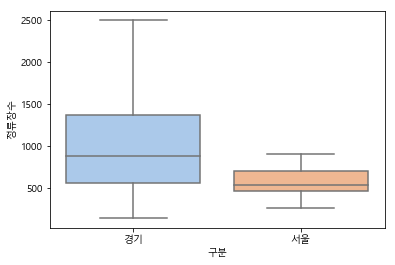

In [35]:
# 이상치 x
sns.set_palette("pastel")
sns.boxplot(x='구분', y='정류장수', data= df)

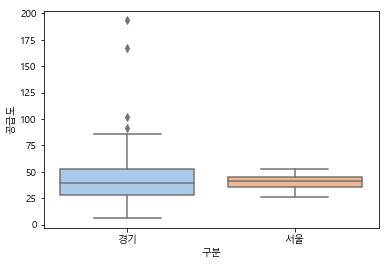

In [36]:
# 이상치 발견!!!
# 공급도 순위가 높은 지역은 철도 서비스 수준이 낮은 지역으로 
# 대부분의 대중교통편이 버스이기 때문에 
# 시가화면적에 비해 정류장수가 많은 것으로 추측

sns.set_palette("pastel")
sns.boxplot(x='구분', y='공급도', data= df)

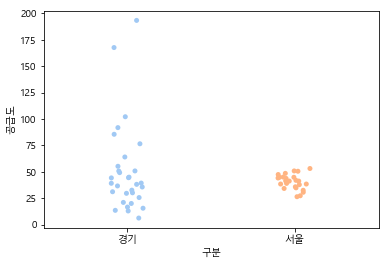

In [37]:
sns.stripplot(x = '구분', y='공급도', data = df)

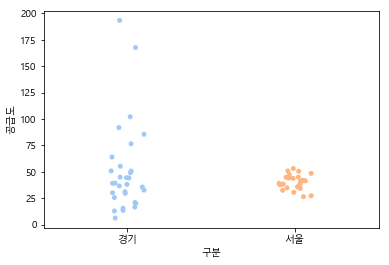

In [38]:
sns.stripplot(x = '구분', y='공급도', data = df)

In [39]:
# 경기도 내 버스정류장 많은 지역 top5 시각화 

In [40]:
df_ggst = df_gg.sort_values(by='정류장수', ascending = False).head(10)
df_ggst = df_ggst.head(5)

In [41]:
df_ggst

,시도,시군구,시가화면적(㎢),정류장수,공급도
9,경기도,고양시,149.73,2501,16.7
23,경기도,화성시,74.32,2431,32.7
18,경기도,용인시,153.72,2395,15.6
19,경기도,파주시,32.87,1819,55.3
12,경기도,남양주시,48.25,1773,36.7


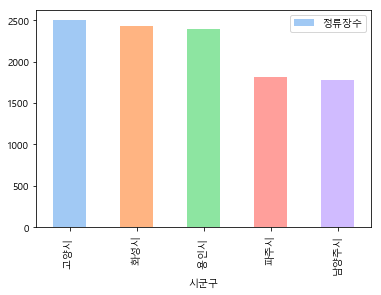

In [42]:
df_ggst.plot(x = '시군구', y = '정류장수', kind = 'bar')

In [43]:
# 경기도 내 공급도 높은 지역 top5 시각화 

In [44]:
df_ggsu = df_gg.sort_values(by='공급도', ascending = False).head(10)
df_ggsu = df_ggsu.head(5)
df_ggsu

,시도,시군구,시가화면적(㎢),정류장수,공급도
30,경기도,양평군,3.66,708,193.4
27,경기도,여주시,4.36,731,167.7
29,경기도,가평군,6.44,658,102.2
24,경기도,광주시,12.17,1119,91.9
20,경기도,이천시,10.37,888,85.6


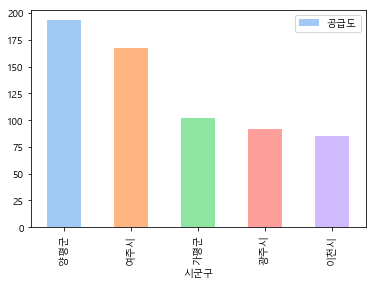

In [45]:
df_ggsu.plot(x = '시군구', y = '공급도', kind = 'bar')

In [46]:
# 경기도 내 정류장수 순위 시각화 (31개 시도 요약)
df_gg_st = df_gg.sort_values(by='정류장수', ascending = False)

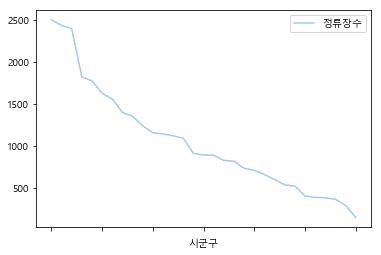

In [47]:
df_gg_st.plot(x = '시군구', y = '정류장수', kind = 'line')

In [48]:
# 경기도 내 공급도 순위 시각화 (31개 시도 요약)
df_gg_su = df_gg.sort_values(by='공급도', ascending = False)

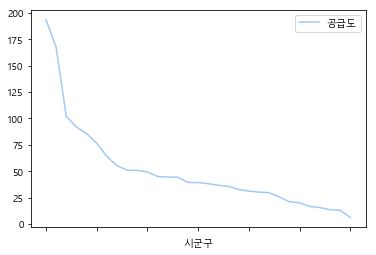

In [49]:
df_gg_su.plot(x = '시군구', y = '공급도', kind = 'line')